# Edit control points

Before scaling
Radius of inner sphere 5e-06
Radius of middle sphere 6e-06

After scaling
Radius of inner sphere 4.0
Radius of middle sphere 5.0
Radius of outer sphere 25.0
Half side length of outer box 50.0



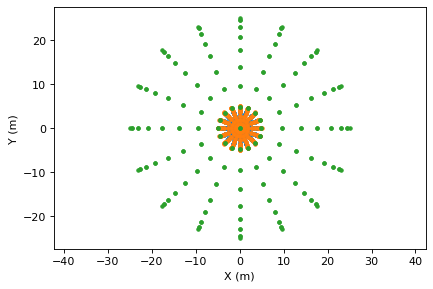

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sphere2=np.loadtxt('sphere2.cpts',usecols=(1,2,3))
s1=sphere2[:242,:] #inner sphere
b1=sphere2[242:246,:] #outer box
s2=sphere2[246:488,:] #middle sphere
s3=np.copy(s2) #outer sphere

print('Before scaling')
print('Radius of inner sphere',(max(s1[:,0])-min(s1[:,0]))/2)
print('Radius of middle sphere',(max(s2[:,0])-min(s2[:,0]))/2)
print('')

s1=s1/5e-6*4 #inner sphere radius 4
b1=b1/25e-6*50 #outer box half side length 50
s2=s2/6e-6*5 #middle sphere radius 5
s3=s3/6e-6*25 #outer sphere radius 25

print('After scaling')
print('Radius of inner sphere',(max(s1[:,0])-min(s1[:,0]))/2)
print('Radius of middle sphere',(max(s2[:,0])-min(s2[:,0]))/2)
print('Radius of outer sphere',(max(s3[:,0])-min(s3[:,0]))/2)
print('Half side length of outer box',(max(b1[:,0])-min(b1[:,0]))/2)
print('')

fig,ax=plt.subplots(dpi=80)
ax.plot(s1[:,0],s1[:,1],'.')
# ax.plot(b1[:,0],b1[:,1],'.')
ax.plot(s2[:,0],s2[:,1],'.')
ax.plot(s3[:,0],s3[:,1],'.')

ax.axis('equal')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
plt.show()

# Save control points

In [2]:
#save sphere control points to a file
sphere=np.zeros((len(s1)*3+len(b1),5))
sphere[:,0]=np.arange(len(sphere))+1

ind_s1=np.arange(len(s1)).astype(int)
ind_b1=np.arange(len(b1)).astype(int)+len(s1)
ind_s2=np.arange(len(s2)).astype(int)+len(s1)+len(b1)
ind_s3=np.arange(len(s3)).astype(int)+len(s1)+len(b1)+len(s2)

sphere[ind_s1,1:4]=s1 #inner sphere
sphere[ind_s1,4]=0 #interior points flag

sphere[ind_b1,1:4]=b1 #outer box
sphere[ind_b1,4]=2 #boundary points flag

sphere[ind_s2,1:4]=s2 #outer sphere
sphere[ind_s2,4]=0 #interior points flag

sphere[ind_s3,1:4]=s3 #inner box
sphere[ind_s3,4]=0 #interior points flag
np.savetxt('sphere.cpts',sphere,fmt='%-4d %10.3e %10.3e %10.3e %4d')

#save sphere plcs to a file
plcs1=np.loadtxt('sphere2.plcs')
plcs2=np.copy(plcs1)
plcs3=np.copy(plcs1)

plcs2[::2,1]=20 #face flag for s2
plcs2[::2,2]=plcs2[::2,-1]+len(plcs1)/2
plcs2[1::2,]=plcs2[1::2,]+len(s1)+len(b1)

plcs3[::2,1]=30
plcs3[::2,2]=plcs3[::2,-1]+len(plcs1)
plcs3[1::2,]=plcs3[1::2,]+len(s1)+len(b1)+len(s2)

plcs=np.r_[plcs1,plcs2,plcs3]
np.savetxt('sphere.plcs',plcs,fmt='%d\t\t%d\t\t%d')
print('Done')

Done
